In [3]:
!sudo apt-get install poppler-utils tesseract-ocr libmagic-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
The following NEW packages will be installed:
  libmagic-dev poppler-utils
0 upgraded, 2 newly installed, 0 to remove and 132 not upgraded.
Need to get 291 kB of archives.
After this operation, 1,085 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 291 kB in 0s (1,097 kB/s)      
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
Selecting previously unselected package libmagic-dev:amd64.
(Reading database 

In [4]:
!pip install -Uq "unstructured[all-docs]" pillow lxml pillow --progress-bar off
!pip install -Uq chromadb tiktoken --progress-bar off
!pip install -Uq langchain langchain-community langchain-groq --progress-bar off
!pip install -Uq python_dotenv --progress-bar off
!pip install pretty_errors --progress-bar off
!pip install sentence-transformers==2.2.2 --progress-bar off

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.4 requires aiofiles<23,>=22.1.0, but you have aiofiles 24.1.0 which is incompatible.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.29.2 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 18.1.0 which is incompatible.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.

In [5]:
import pretty_errors
from tqdm import tqdm
from unstructured.partition.pdf import partition_pdf

data_path = '/kaggle/input/data-pdf/k24-493.pdf'

chunks = partition_pdf(
    filename=data_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

)

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [6]:
print(f'Length of extracted chunks: {len(chunks)}')
print(f'Unique types of extracted chunks: {set([str(type(el)) for el in chunks])}')

Length of extracted chunks: 177
Unique types of extracted chunks: {"<class 'unstructured.documents.elements.Header'>", "<class 'unstructured.documents.elements.ListItem'>", "<class 'unstructured.documents.elements.NarrativeText'>", "<class 'unstructured.documents.elements.Text'>", "<class 'unstructured.documents.elements.FigureCaption'>", "<class 'unstructured.documents.elements.Table'>", "<class 'unstructured.documents.elements.Title'>", "<class 'unstructured.documents.elements.Image'>"}


In [7]:
tables, texts, images, titles, footer, header, narrative_texts, list_items = [], [], [], [], [], [], [], []

# Categorize each chunk based on its type
for chunk in tqdm(chunks, desc='Sorting chunks'):
    if "unstructured.documents.elements.Table" in str(type(chunk)):
        tables.append(str(chunk))
    elif "unstructured.documents.elements.NarrativeText" in str(type(chunk)):
        narrative_texts.append(str(chunk))
    elif "unstructured.documents.elements.Text" in str(type(chunk)):  # Text objects
        texts.append(str(chunk))
    elif "unstructured.documents.elements.Image" in str(type(chunk)):
        images.append(chunk)
    elif "unstructured.documents.elements.Title" in str(type(chunk)):
        titles.append(str(chunk))
    elif "unstructured.documents.elements.Footer" in str(type(chunk)):
        footer.append(str(chunk))
    elif "unstructured.documents.elements.Header" in str(type(chunk)):
        header.append(str(chunk))
    elif "unstructured.documents.elements.ListItem" in str(type(chunk)):
        list_items.append(str(chunk))

Sorting chunks: 100%|██████████| 177/177 [00:00<00:00, 292625.86it/s]


In [8]:
narrative_texts[20]

'In this work, we tackle the challenge of tracking the evolution of dysgraphia using probabilistic ML. Researchers in [15] utilized unsupervised learning with the K-Means clustering method to categorize children into three clusters. Cluster C1 exhibited mild dysgraphia, while C2 and C3 exhibited severe dysgraphia. However, the classification lacks the provision of evolution information if the child does not transition through the different clusters. To the best of our knowledge, there is no existing proposal addressing the tracking of the evolution of dysgraphia with a score reflecting the individual’s situation at each evaluation.'

In [9]:
from src.utlis import get_images_base64
from src.utlis import display_base64_image

base64_images = [el.metadata.image_base64 for el in images]

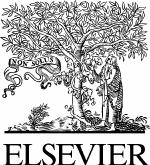

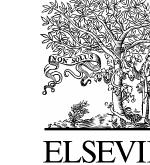

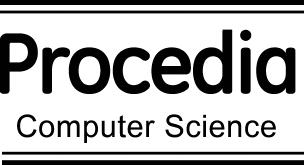

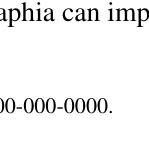

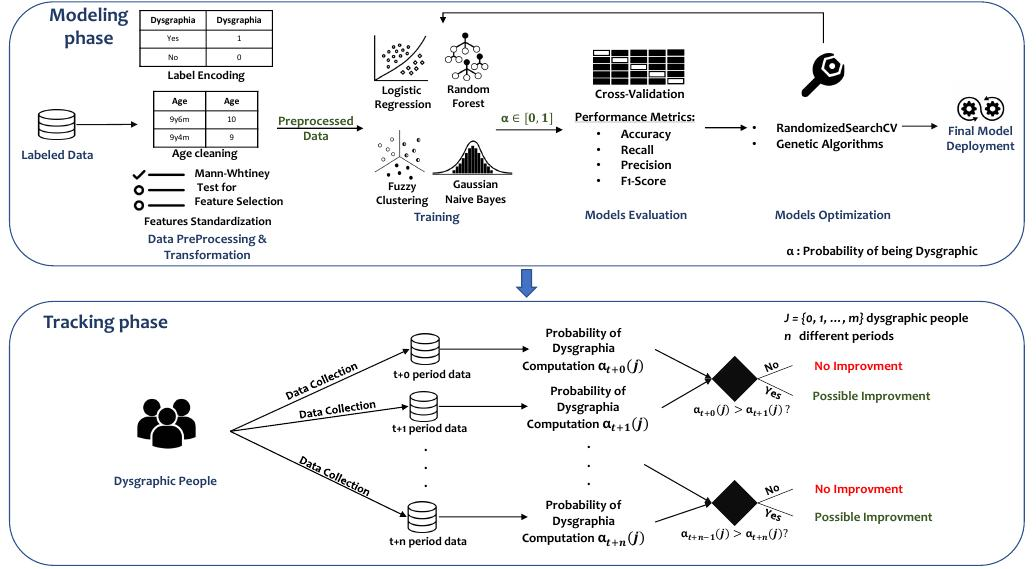

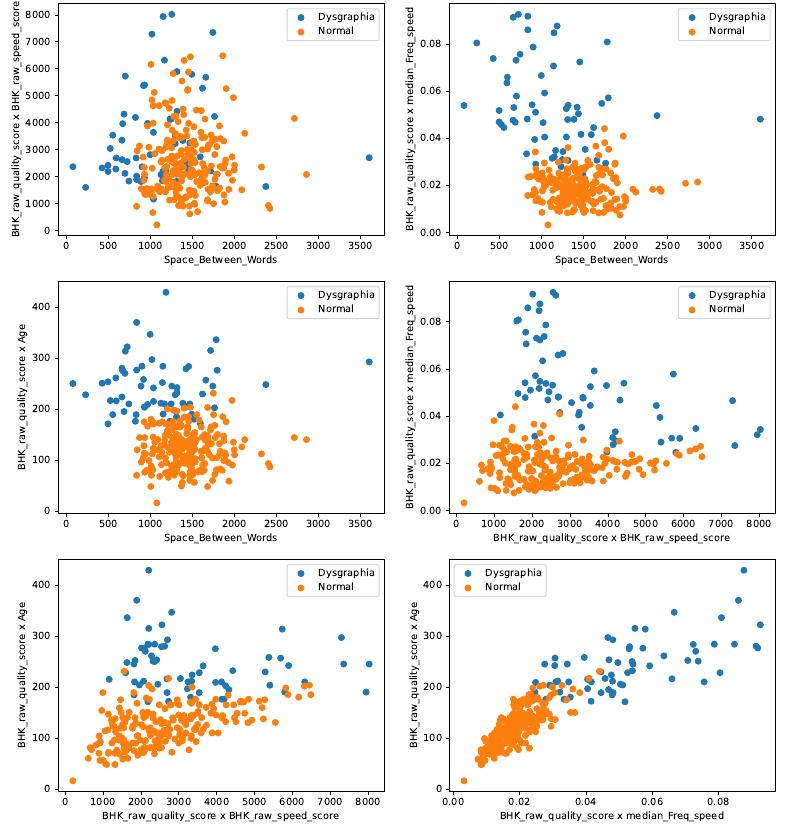

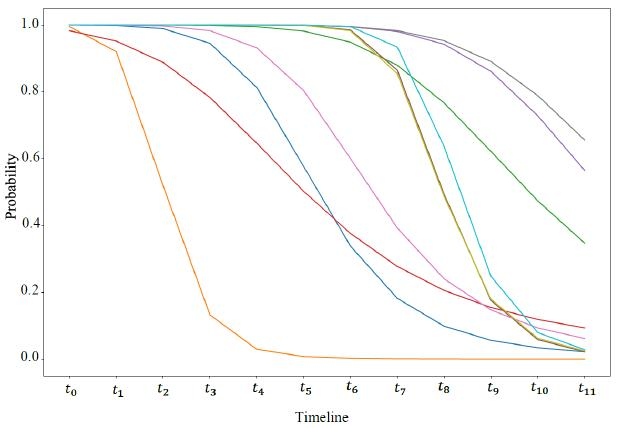

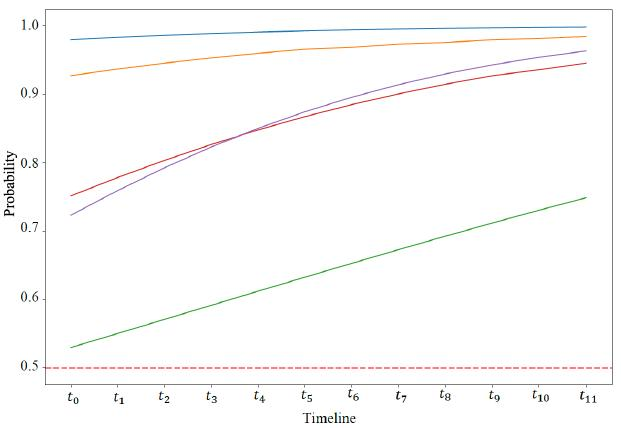

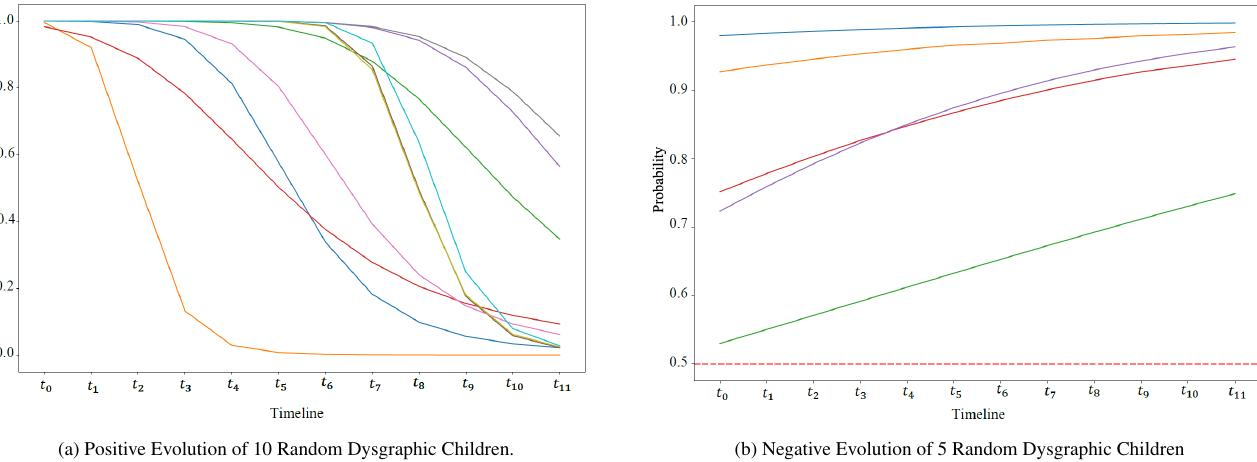

In [10]:
for image in base64_images:
    display_base64_image(image)

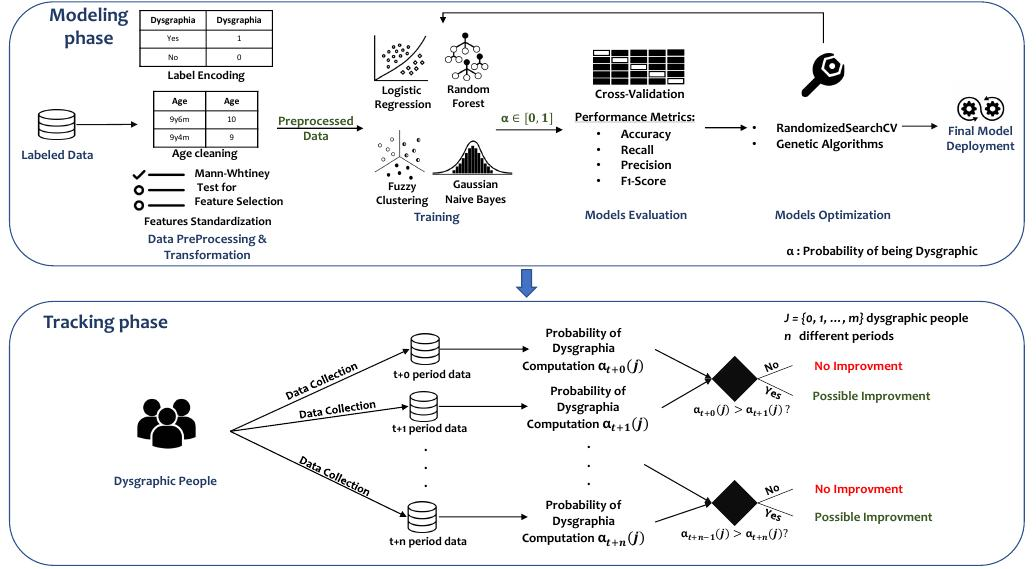

In [11]:
base64_images = base64_images[4:]
display_base64_image(base64_images[0])

In [12]:
list_items[:2]

['• Static features: Representing the geometric characteristics of the written text. The static features in the dataset include Space Between Words, SD of Handwriting Density, Median of Power Spectral of Tremor Freq.',
 '• Kinematic features: Features describing the dynamic of the handwriting process. kinematic features consist of']

# Summarizing texts and tables

In [13]:
!pip install -Uq langchain-groq

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [14]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [15]:
import os

os.environ["GROQ_API_KEY"] = "your_key"

from groq import Client

client = Client(api_key=os.getenv("GROQ_API_KEY"))

In [16]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""

     
prompt = ChatPromptTemplate.from_template(prompt_text)

model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [18]:
import time
text_summaries = []
batch_size = 29

for i in range(0, len(narrative_texts), batch_size):
    batch = narrative_texts[i:i + batch_size]
    text_summaries += summarize_chain.batch(batch, {"max_concurrency": 3})
    time.sleep(60) # Can only make 30 request per minute, so we pass a batch of 29 and wait 60 seconds
    

# Summarize tables
table_summaries = summarize_chain.batch(tables, {"max_concurrency": 3})

In [19]:
import random

random_num = random.randint(0, len(tables) - 1)
print(f'Original table:\n\t{tables[random_num]}')
print(f'Summary:\n\t{table_summaries[random_num]}')

Original table:
	Accuracy Recall Precision F1 Score Random Forest 0.9644 0.9000 0.9418 0.9177 Logistic Regression 0.9745 0.9027 0.9800 0.9350 Fuzzy C-Means 0.5210 0.6110 0.2580 0.3630 GaussianNB 0.9592 0.9500 0.8930 0.9140
Summary:
	Random Forest and Logistic Regression have higher F1 scores, with 0.9177 and 0.9350 respectively, indicating better overall performance compared to Fuzzy C-Means and GaussianNB.


In [20]:
random_num = random.randint(0, len(narrative_texts) - 1)
print(f'Original table:\n\t{narrative_texts[random_num]}')
print(f'Summary:\n\t{text_summaries[random_num]}')

Original table:
	outcomes. The primary aim of hyperparameter optimization is to identify the most effective values for these hyperpa- rameters, with the ultimate goal of enhancing prediction accuracy.
Summary:
	The primary aim of hyperparameter optimization is to identify the most effective values for hyperparameters to enhance prediction accuracy.


# Summarizing images

In [21]:
!curl -fsSL https://ollama.com/install.sh | sh

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%####################                                                           39.3%##################################################                                  66.5%##########################################################################    98.1%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [22]:
!pip install -U langchain-ollama --quiet 

   25l   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/76.4 kB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.1 MB/s eta 0:00:00


In [23]:
from langchain_ollama import OllamaLLM 

In [24]:
prompt = """Describe the image in detail. For context,
            the image is part of a research paper. 
            Be specific about graphs, such as scatter plots, line plots."""

In [27]:
import subprocess

MODEL_NAME = "llava:13b"
subprocess.run(["ollama", "run", MODEL_NAME], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
process = subprocess.Popen("ollama serve", shell=True) 

In [28]:
llm = OllamaLLM(model=MODEL_NAME)
images_summaries = []

for image in tqdm(base64_images, desc='Summarizing images'):
    llm_with_images = llm.bind(images=[image])
    summary = llm_with_images.invoke(prompt)
    images_summaries.append(summary)

Summarizing images: 100%|██████████| 5/5 [01:24<00:00, 16.98s/it]


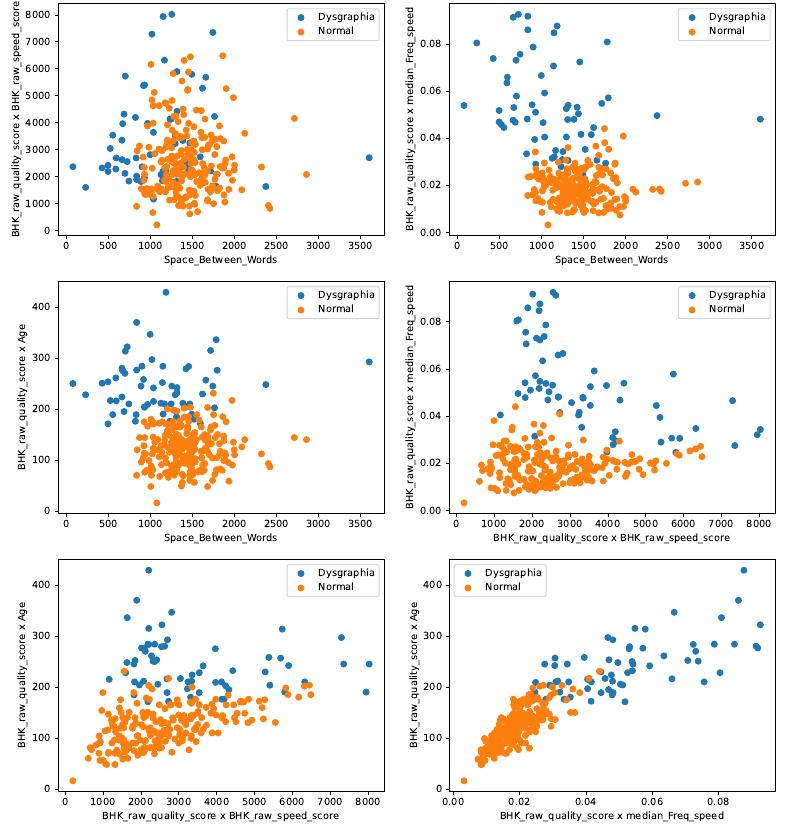

 The image you've provided appears to be a composite of several subfigures from a scientific research paper. These subfigures are related to statistical analyses conducted within the study, likely in the field of genomics or biology due to the terminology and graph types used. Here's a detailed description:

1. The top left subfigure is a scatter plot with a x-axis titled "Household income (thousands of dollars)" and a y-axis titled "Household size". There are several points scattered across this plot, indicating some form of correlation or relationship between income and household size.

2. The top right subfigure is another scatter plot with an x-axis labeled "Months since last negative pregnancy test" and a y-axis titled "BMI (kg/m^2)". This plot also has several scattered points, suggesting some connection between the duration of pregnancy tests and body mass index.

3. The bottom left subfigure shows two bar graphs side by side. Each graph has two bars: one in orange and one in li

In [30]:
import random

random_num = random.randint(0, len(base64_images)-1)
display_base64_image(base64_images[random_num])
print(images_summaries[random_num])

# Vector Store

In [31]:
!pip install langchain_huggingface --quiet
!pip install langchain-chroma --quiet

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   25l   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/268.8 kB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 266.2/268.8 kB 9.9 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.5 MB/s eta 0:00:00


In [32]:
import uuid
from langchain_chroma  import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain_ollama import OllamaEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [33]:
subprocess.run(["ollama", "run", 'llama3'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

CompletedProcess(args=['ollama', 'run', 'llama3'], returncode=0)

In [34]:
embeddings = OllamaEmbeddings(model='llama3')

In [40]:
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=embeddings, persist_directory='/kaggle/working/chroma_db')

In [41]:
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

In [42]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in narrative_texts]

summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, narrative_texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in base64_images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(images_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

# RAG Pipeline

In [43]:
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

llm = ChatOllama(model="llama2:13b-chat", temperature=0)




# Prompt template
template = """Answer the question based only on the following context:
{context}
Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [44]:
# Testing the rag chain

chain.invoke(
       "Exaplin the approach of the paper?"
)

"The approach presented in the paper involves using a probabilistic machine learning algorithm to track the evolution of a person's disease, specifically dysgraphia. The algorithm, Gaussian Naive Bayes, computes a score for each individual indicating their likelihood of belonging to the Dysgraphic class.\n\nTo achieve this, the authors:\n\n1. Compared various probabilistic and fuzzy machine learning algorithms.\n2. Selected the Gaussian Naive Bayes algorithm, which achieved the highest performance for the tracking task.\n3. Generated a series of data that simulates the evolution of individuals with dysgraphia.\n4. Trained the selected algorithm on the simulated data to compute the Dysgraphic class score for each individual.\n5. Monitored the individual's progress over time by computing the score at different intervals.\n\nThis approach allows for the automatic tracking of a person's disease evolution, enabling early detection and monitoring of the condition."